In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [11]:
raw_data_path = "ASTR19_F25_group_project_data.txt"

usable_data = np.genfromtxt(
    raw_data_path,
    comments="#",
    dtype=[("day", int), ("time_str", "U8"), ("height_ft", float)],
    autostrip=True,
)

In [12]:
parts = np.char.partition(usable_data["time_str"], ":")
hour = parts[:, 0].astype(int)
minute = parts[:, 2].astype(int)

#T+ time in minutes if needs to be used in the future
t_plus_minutes = ((24 * (usable_data["day"]-1) + hour) * 60) + minute
#T+ time in hours
t_plus_hours = t_plus_minutes / 60
y_axis = usable_data["height_ft"].astype(float)

In [13]:
print(f"Loaded {t_plus_hours.size} rows from {raw_data_path}")
for i in range(usable_data.size):
   print(f"day={usable_data['day'][i]} "
         f"time={usable_data['time_str'][i]} "
         f"t_hours={t_plus_hours[i]} "
         f"t_minutes={t_plus_minutes[i]} "
         f"height_ft={y_axis[i]}")

Loaded 82 rows from ASTR19_F25_group_project_data.txt
day=1 time=8:07 t_hours=8.116666666666667 t_minutes=487 height_ft=6.57
day=1 time=15:37 t_hours=15.616666666666667 t_minutes=937 height_ft=-0.39
day=2 time=8:55 t_hours=32.916666666666664 t_minutes=1975 height_ft=5.38
day=2 time=16:25 t_hours=40.416666666666664 t_minutes=2425 height_ft=-1.74
day=3 time=9:45 t_hours=57.75 t_minutes=3465 height_ft=5.26
day=3 time=17:14 t_hours=65.23333333333333 t_minutes=3914 height_ft=-1.36
day=4 time=10:35 t_hours=82.58333333333333 t_minutes=4955 height_ft=4.13
day=4 time=18:00 t_hours=90.0 t_minutes=5400 height_ft=-1.15
day=5 time=11:28 t_hours=107.46666666666667 t_minutes=6448 height_ft=3.48
day=5 time=18:46 t_hours=114.76666666666667 t_minutes=6886 height_ft=-1.61
day=6 time=12:22 t_hours=132.36666666666667 t_minutes=7942 height_ft=2.62
day=6 time=19:31 t_hours=139.51666666666668 t_minutes=8371 height_ft=0.05
day=7 time=13:24 t_hours=157.4 t_minutes=9444 height_ft=1.83
day=7 time=20:16 t_hours=16

In [14]:
def tide_model(t, A1, phi1, A2, phi2, offset):
    P1 = 12.42 
    P2 = 24.0 
    return(A1*np.sin(2*np.pi * t / P1 + phi1) +
        A2*np.sin(2*np.pi * t / P2 + phi2) + 
        offset) 
sigma_meas = 0.25 
sigma_array = np.full_like(y_axis, sigma_meas) 

p0 = [1.0, 0.0, 0.5, 0.0, np.mean(y_axis)]
popt, pcov = curve_fit(
    tide_model,
    t_plus_hours, 
    y_axis, 
    p0=p0,
    sigma=sigma_array, 
    absolute_sigma=True, 
    maxfev=20000 
    )

print("best fit parameters:\n", popt) 


best fit parameters:
 [-1.01940975 -1.02364008  2.67614761 -0.27512789  2.52378666]


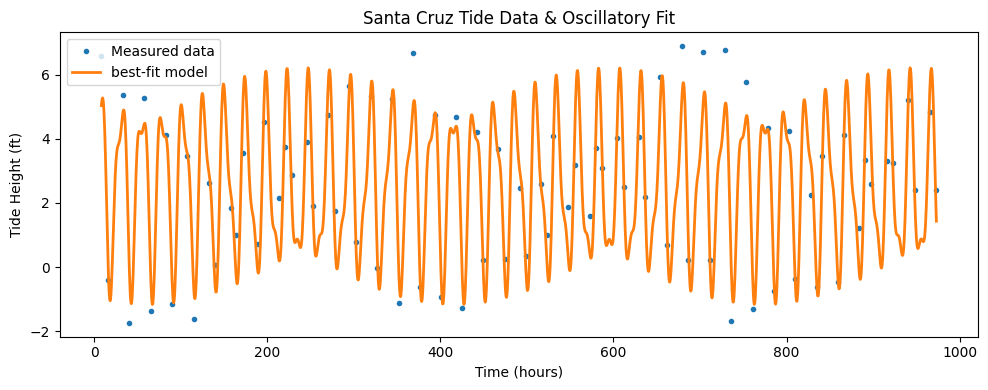

In [15]:
t_dense = np.linspace(min(t_plus_hours), max(t_plus_hours), 2000)
model_dense = tide_model(t_dense, *popt) 

plt.figure(figsize=(10,4)) 
plt.plot(t_plus_hours, y_axis, 'o', markersize=3, label='Measured data') 
plt.plot(t_dense, model_dense, '-', linewidth=2, label='best-fit model') 

plt.xlabel("Time (hours)") 
plt.ylabel("Tide Height (ft)")
plt.title("Santa Cruz Tide Data & Oscillatory Fit") 
plt.legend()
plt.tight_layout()
plt.savefig("tide_model_fit.pdf") 
plt.show()